## Density matrices and Krauss operators

In [14]:
from sympy import *
from sympy.physics.quantum.qubit import Qubit,matrix_to_qubit,represent,matrix_to_density
from sympy.physics.quantum import TensorProduct,Dagger
from sympy.core.trace import Tr

In [47]:
r=symbols('r_{x} r_{y} r_{z}',real=True)

The qubit density matrix is usually express in terms of the pauli matrices as 

$\rho=\frac{\mathcal{1}}{2}+ \vec{r}. \vec{\sigma}$

**Task** Define such a density matrix, and repeat the analysis from last lesson to see under which conditions it is valid, and pure

We recently took a look at the amplitud damping channel

\begin{equation}
E_{0}=\begin{pmatrix}
1 & 0 \\ 0 & \sqrt{1-\lambda}
\end{pmatrix}
\end{equation}

\begin{equation}
E_{1}=\begin{pmatrix}
0 & \sqrt{\lambda}  \\ 0&0
\end{pmatrix}
\end{equation}

How does this map affect the qubit density matrix? use a for loop for the inner product or a vector of matrices (using symbols), and verify that $\sum_{k}^{n}E_{k}E_{k}^{\dagger}=\mathcal{I}$

In [53]:
X=Matrix([[0,1],[1,0]])
Y=Matrix([[0,-I],[I,0]])
Z=Matrix([[1,0],[0,-1]])
λ=symbols('λ', real=True)
E0=Matrix([[1,0],[0,sqrt(1-λ)]])
E1=Matrix([[0,sqrt(λ)],[0,0]])


In [69]:
σ=[X,Y,Z]
var=[r[i]*σ[i] for i in range(0,len(r))]
P=(eye(2)/2)
for i in var:
    P+=i/2
P

Matrix([
[      r_{z}/2 + 1/2, r_{x}/2 - I*r_{y}/2],
[r_{x}/2 + I*r_{y}/2,       1/2 - r_{z}/2]])

In [79]:
var1=E0*P*Dagger(E0)+E1*P*Dagger(E1)
var1.subs({conjugate(sqrt(λ)):sqrt(λ),conjugate(sqrt(1-λ)):sqrt(1-λ)}).expand()


Matrix([
[           -r_{z}*λ/2 + r_{z}/2 + λ/2 + 1/2, r_{x}*sqrt(1 - λ)/2 - I*r_{y}*sqrt(1 - λ)/2],
[r_{x}*sqrt(1 - λ)/2 + I*r_{y}*sqrt(1 - λ)/2,             r_{z}*λ/2 - r_{z}/2 - λ/2 + 1/2]])

<IPython.core.display.Javascript object>


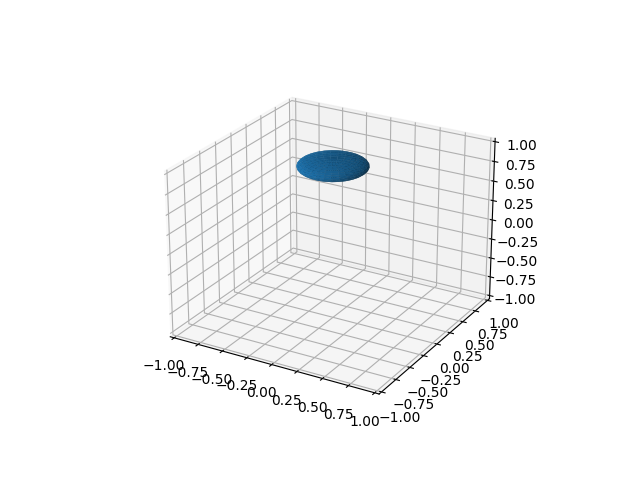

In [82]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
r=1
u,v=np.mgrid[0:2*np.pi:30j,0:np.pi:20j]
lamda=0.9
x=np.sqrt(1-lamda)*np.cos(u)*np.sin(v)
y=np.sqrt(1-lamda)*np.sin(u)*np.sin(v)
z=(1-lamda)*np.cos(v)+lamda
ax.plot_surface(x,y,z)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

In [87]:
E0=Matrix([[sqrt(λ),0],[0,sqrt(λ)]])
E1=Matrix([[0,sqrt(1-λ)],[sqrt(1-λ),0]])

In [91]:
var2=E0*P*Dagger(E0)+E1*P*Dagger(E1)
var2.subs({conjugate(sqrt(λ)):sqrt(λ),conjugate(sqrt(1-λ)):sqrt(1-λ)}).expand()

Matrix([
[        r_{z}*λ - r_{z}/2 + 1/2, r_{x}/2 - I*r_{y}*λ + I*r_{y}/2],
[r_{x}/2 + I*r_{y}*λ - I*r_{y}/2,        -r_{z}*λ + r_{z}/2 + 1/2]])

In [92]:
P


Matrix([
[      r_{z}/2 + 1/2, r_{x}/2 - I*r_{y}/2],
[r_{x}/2 + I*r_{y}/2,       1/2 - r_{z}/2]])

<IPython.core.display.Javascript object>


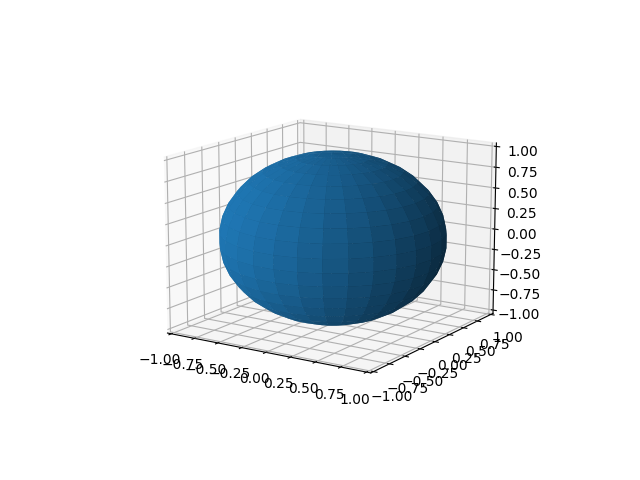

In [98]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
r=1
u,v=np.mgrid[0:2*np.pi:30j,0:np.pi:20j]
lamda=0
x=np.cos(u)*np.sin(v)
y=(2*lamda-1)*np.sin(u)*np.sin(v)
z=np.cos(v)*(2*lamda-1)
ax.plot_surface(x,y,z)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()